In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, make_scorer, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline as ImbPipeline

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Dataset Exploration

## Loading data

In [2]:
data = pd.read_csv('diabetes_health_indicators.csv', sep=',')

data.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4


## Basic information

In [3]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 253680
Number of columns: 22


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes              253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes,253680.0,0.157588,0.364355,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [6]:
data.isna().sum()

Diabetes                0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

There are no na values.

## Visualization

Checking outliers

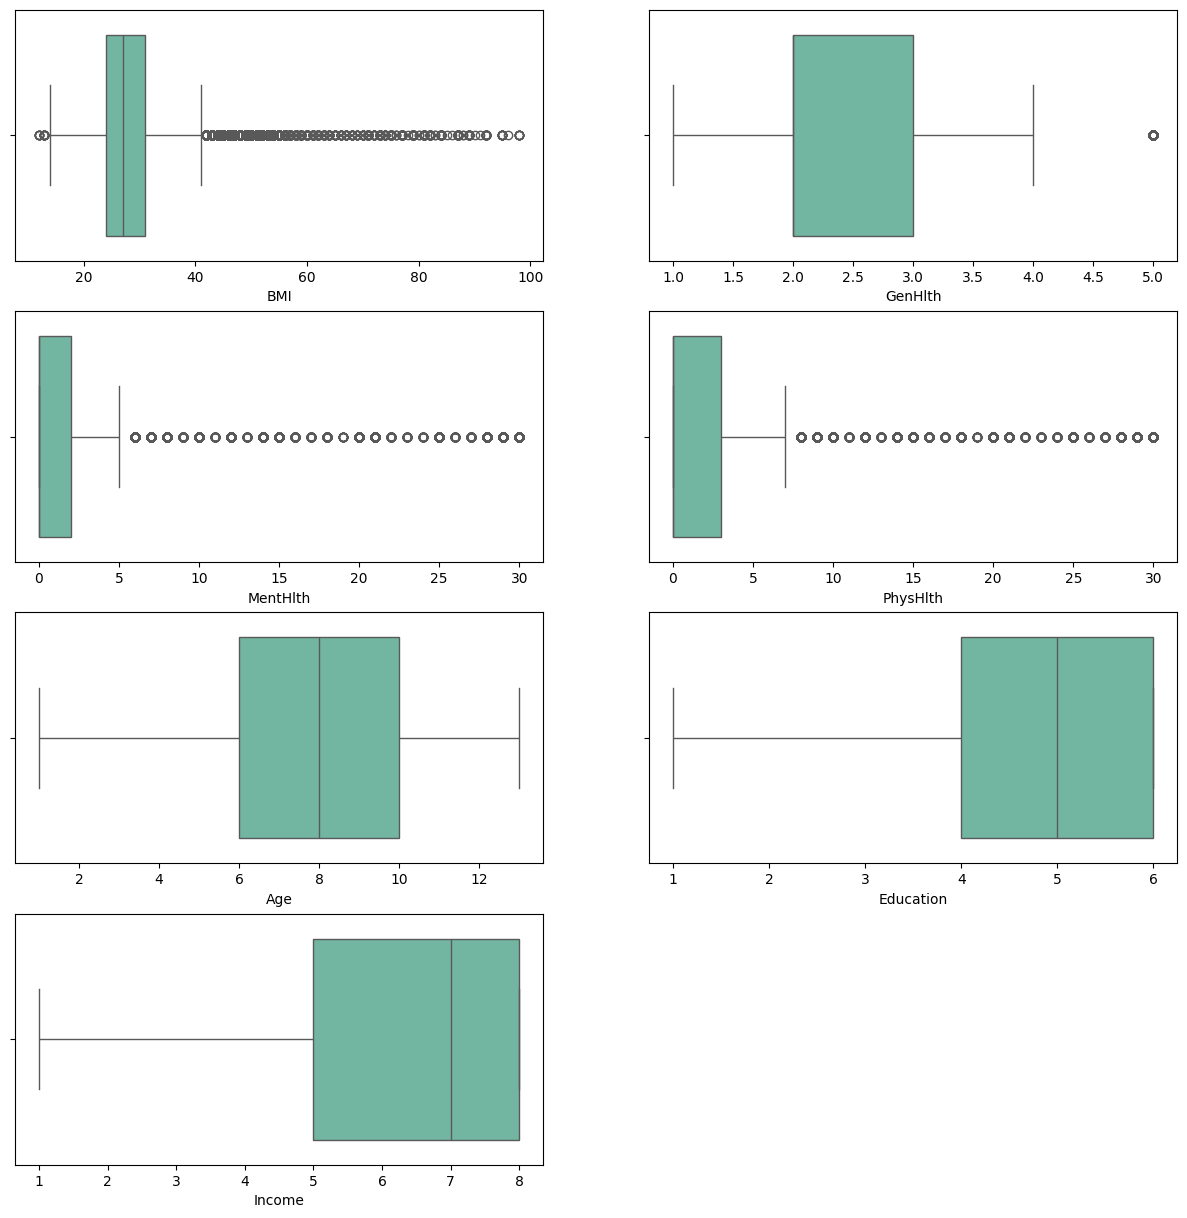

In [7]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

There are no outliers in the data.

**Check duplicated data**

In [8]:
data.duplicated().sum()

23968

Since we have duplicates in our data, we must get rid of it. Duplicate data doesn't carry any important or new information

In [9]:
data.drop_duplicates(inplace = True)

data.duplicated().sum()

0

In [10]:
data.shape

(229712, 22)

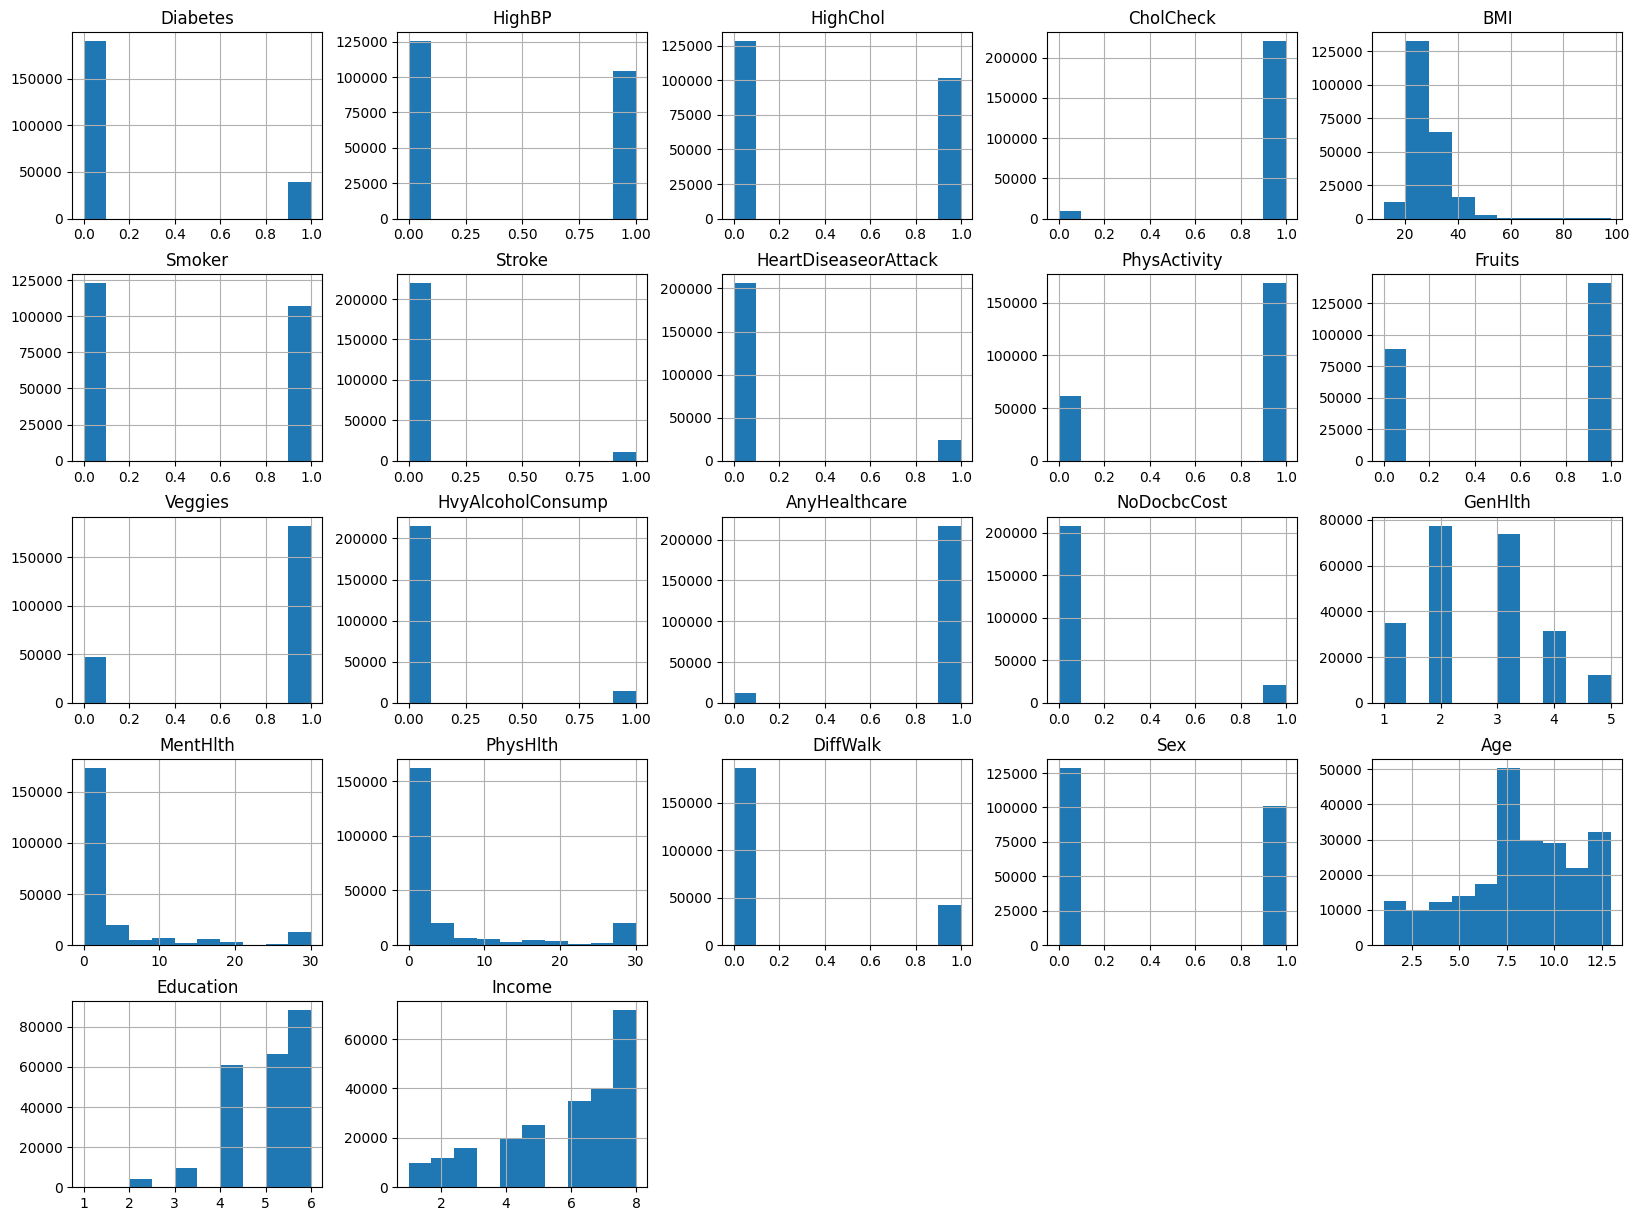

In [11]:
data.hist(figsize=(20, 15))

plt.show()

Conclusions from these histograms:
* Imbalance in Target Variable: The dataset has a significant imbalance in the target variable (Diabetes)

* Health Metrics: Many individuals do not suffer from high blood pressure, high cholesterol, heart disease, or stroke. However, a notable portion of the population has reported some form of physical activity, indicating overall health awareness.

* Lifestyle Factors: The smoking rate and heavy alcohol consumption are relatively low. There is also a noticeable difference between fruit and vegetable consumption habits, with more people consuming vegetables daily.

* Socioeconomic Factors: Most individuals have healthcare coverage, and a relatively small number report being unable to see a doctor due to cost. The dataset shows a diverse range of education and income levels, with higher education and income categories being more prevalent.

* Age Distribution: The age distribution suggests a broad representation across different age groups, with a slightly higher number of older individuals.

**Checking correlation of features**

Text(0.5, 1.0, 'correlation of feature')

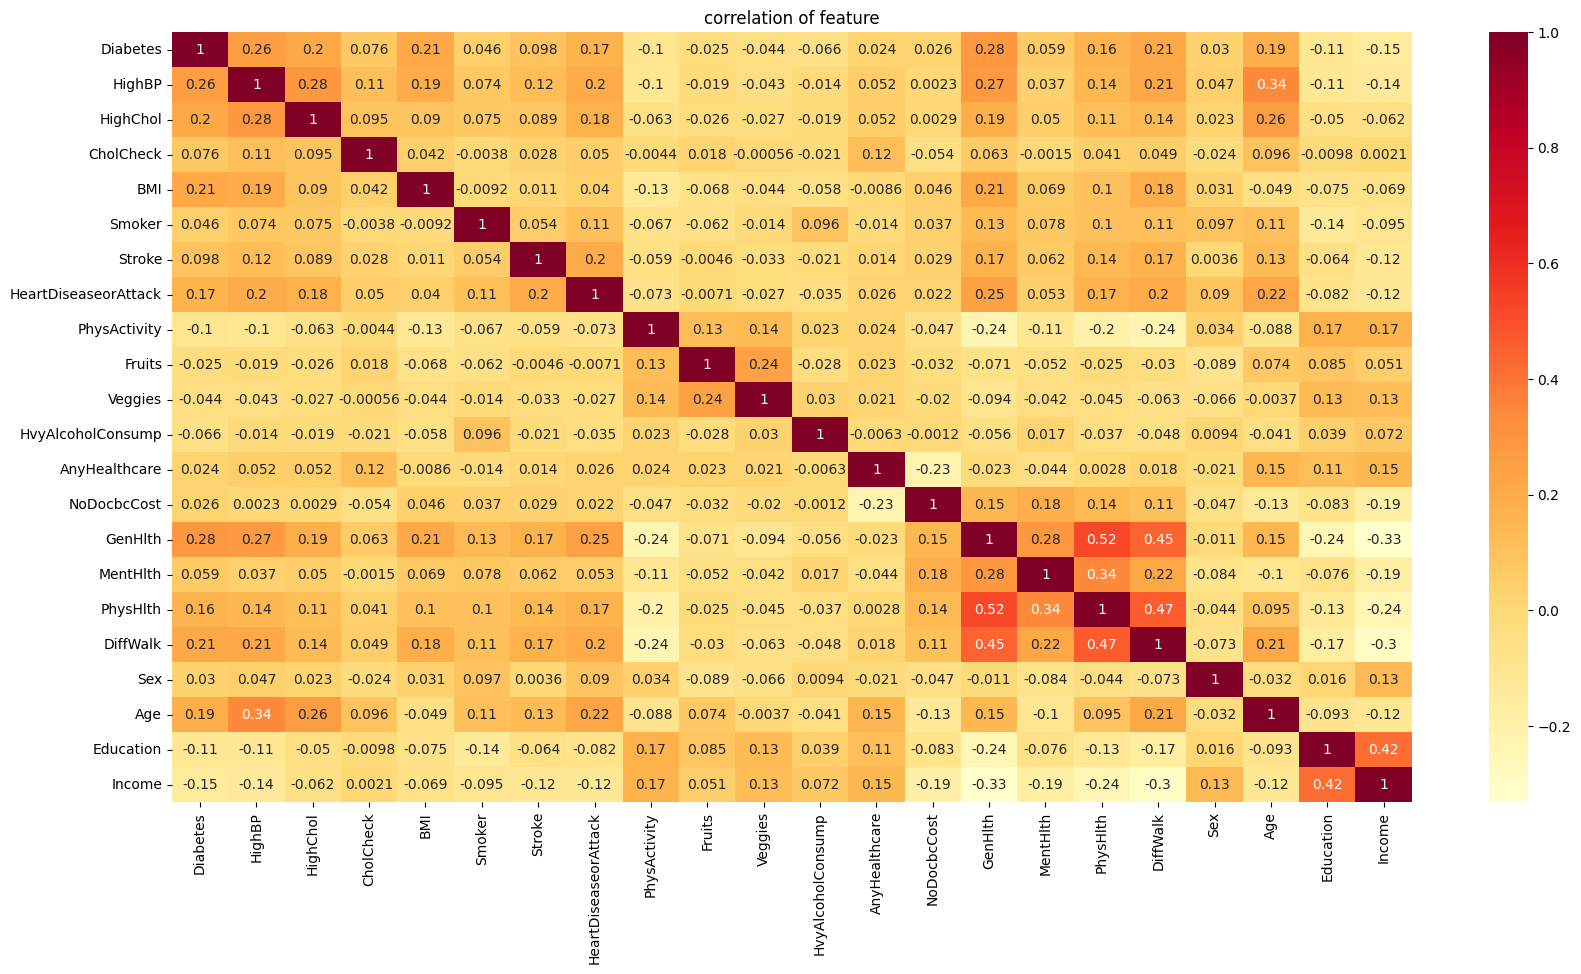

In [12]:
plt.figure(figsize = (20,10))

sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )

plt.title("correlation of feature")

(GenHlth, PhysHlth), (PhysHlth, DiffWalk), (GenHlth, DiffWalk) have high positive correlation with each other.

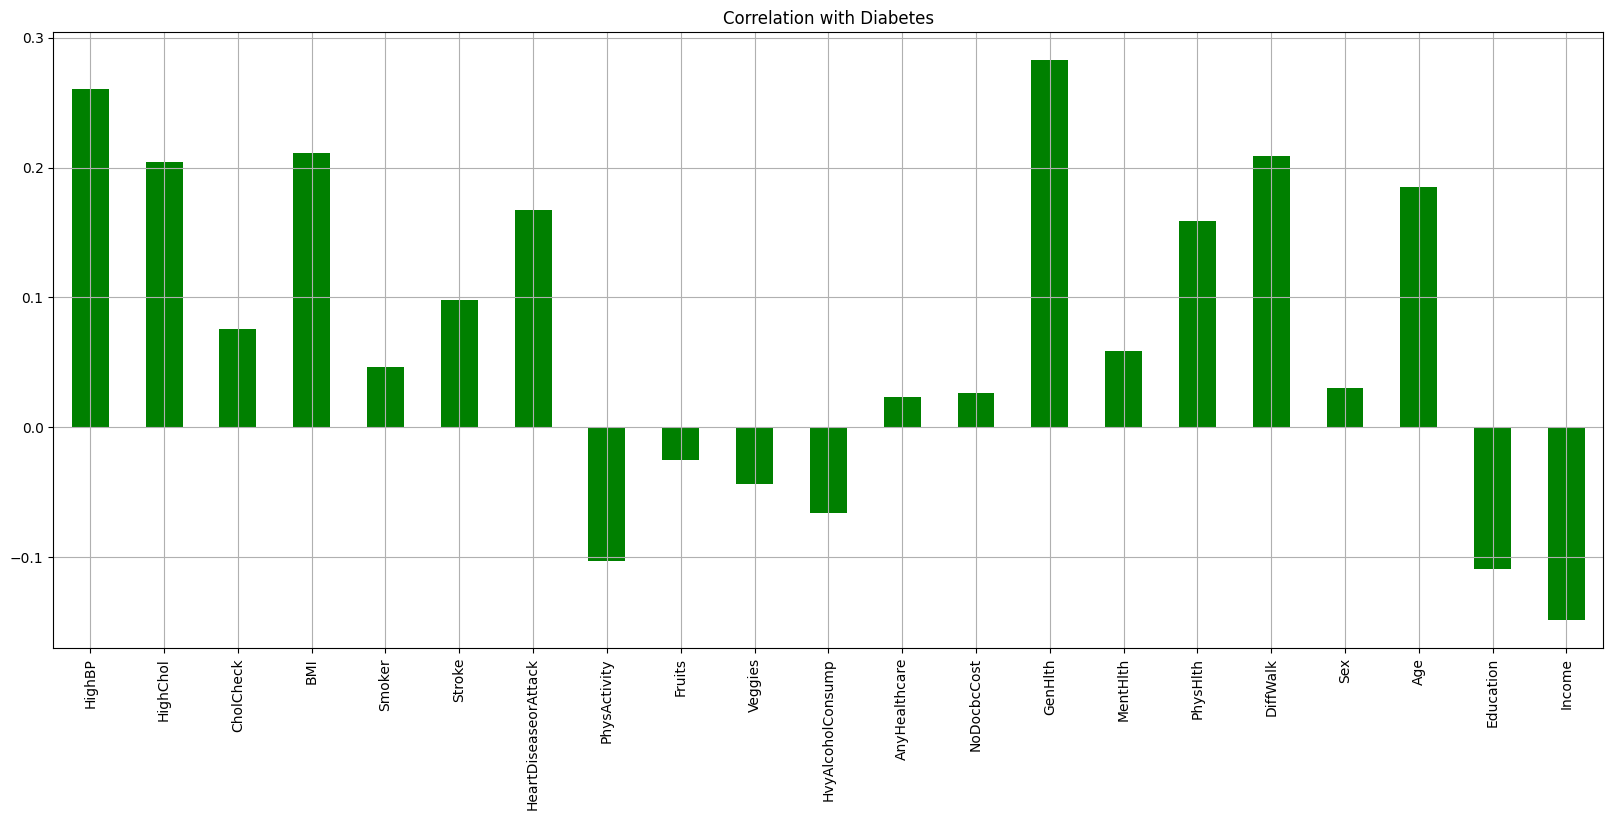

In [13]:
data.drop('Diabetes', axis=1).corrwith(data.Diabetes).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes",color="Green");

From this plot we can conclude that:
* Fruits, Veggies, AnyHealthcare, CholCheck, NoDocbccost and Sex are least correlated with Diabetes feature.
* HighBP, HighChol, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, HvyAlcoholconsump, GenHlth, PhysHlth, Age, Education, Income and DiffWalk have a significant correlation with Diabetes, which makes sense because most of these features describe or affect health of an individual.

**Let's view our target variable.**

In [14]:
diabetes = data[data['Diabetes'] == 1]
no_diabetes = data[data['Diabetes'] == 0]

diabetes_count = diabetes.shape[0]
no_diabetes_count = no_diabetes.shape[0]

counts = pd.DataFrame({
    'Diabetes': ['With Diabetes', 'Without Diabetes'],
    'Count': [diabetes_count, no_diabetes_count]
})

print('Number of people with diabetes:', diabetes_count)
print('Number of people without diabetes:', no_diabetes_count)

Number of people with diabetes: 39657
Number of people without diabetes: 190055


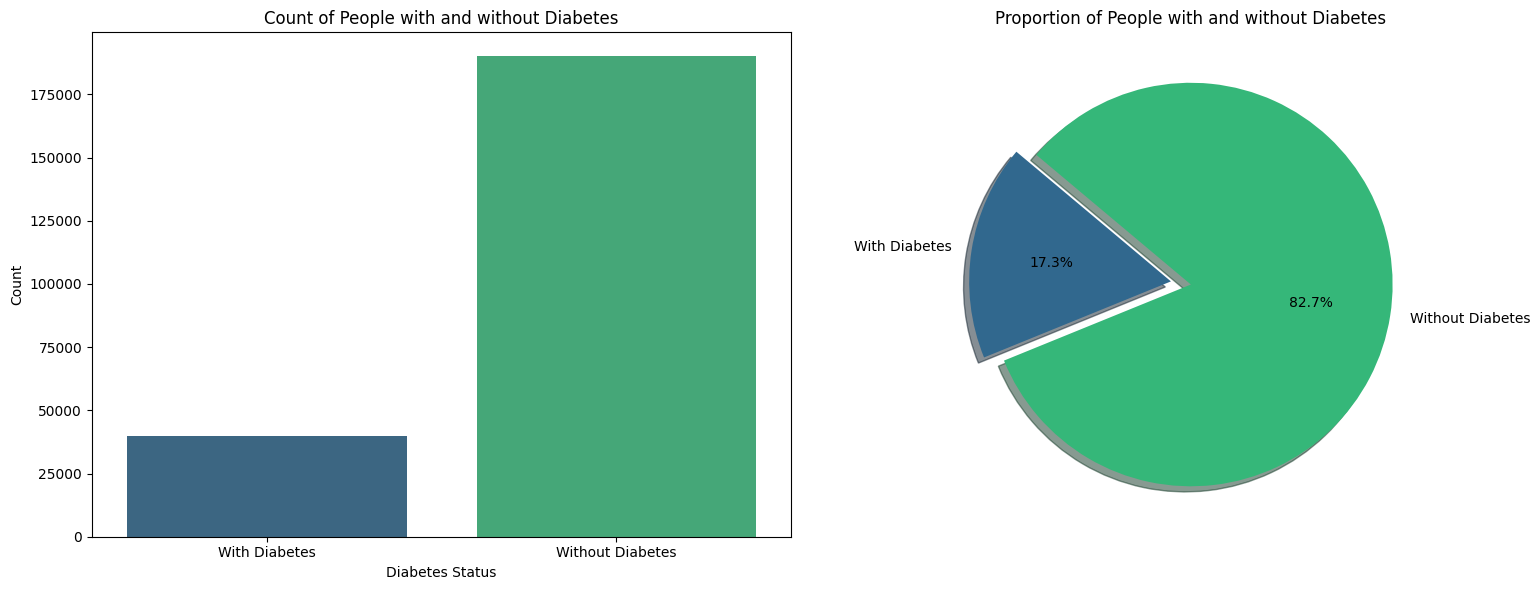

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
sns.barplot(x='Diabetes', y='Count', data=counts, palette='viridis', ax=axes[0])
axes[0].set_title('Count of People with and without Diabetes')
axes[0].set_xlabel('Diabetes Status')
axes[0].set_ylabel('Count')

# Pie chart
labels = counts['Diabetes']
sizes = counts['Count']
colors = sns.color_palette('viridis', len(labels))
explode = (0.1, 0)

axes[1].pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
axes[1].set_title('Proportion of People with and without Diabetes')

# Adjust layout
plt.tight_layout()
plt.show()

We have highly unbalanced problem, so we must find a way to input some values to make our predicting classes balanced.

**Relation of features with target feature**

I added a string representation of diabetes column and yes, no for 1 and 0 values for easier understanding.

In [16]:
cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
        'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

data2 = data.copy()

data2["Diabetes_str"] = data2["Diabetes"].replace({0:"Non-Diabetic", 1:"Diabetic"})

data2[cols] = data2[cols].replace({0:"No", 1:"Yes"})

In [17]:
data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

labels = ['underweight', 'healthy weight', 'overweight', 'obese']
#create new binned column
bins = [0, 18.5, 24.9, 29.9, float('inf')]

data2['BMI_bins'] = pd.cut(data['BMI'], bins=bins, labels=labels)

In [18]:
def create_plot_pivot(data, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data.groupby([x_column, 'Diabetes_str']).size() \
    .reset_index().pivot(columns='Diabetes_str', index=x_column, values=0).fillna(0)
    return _df_plot

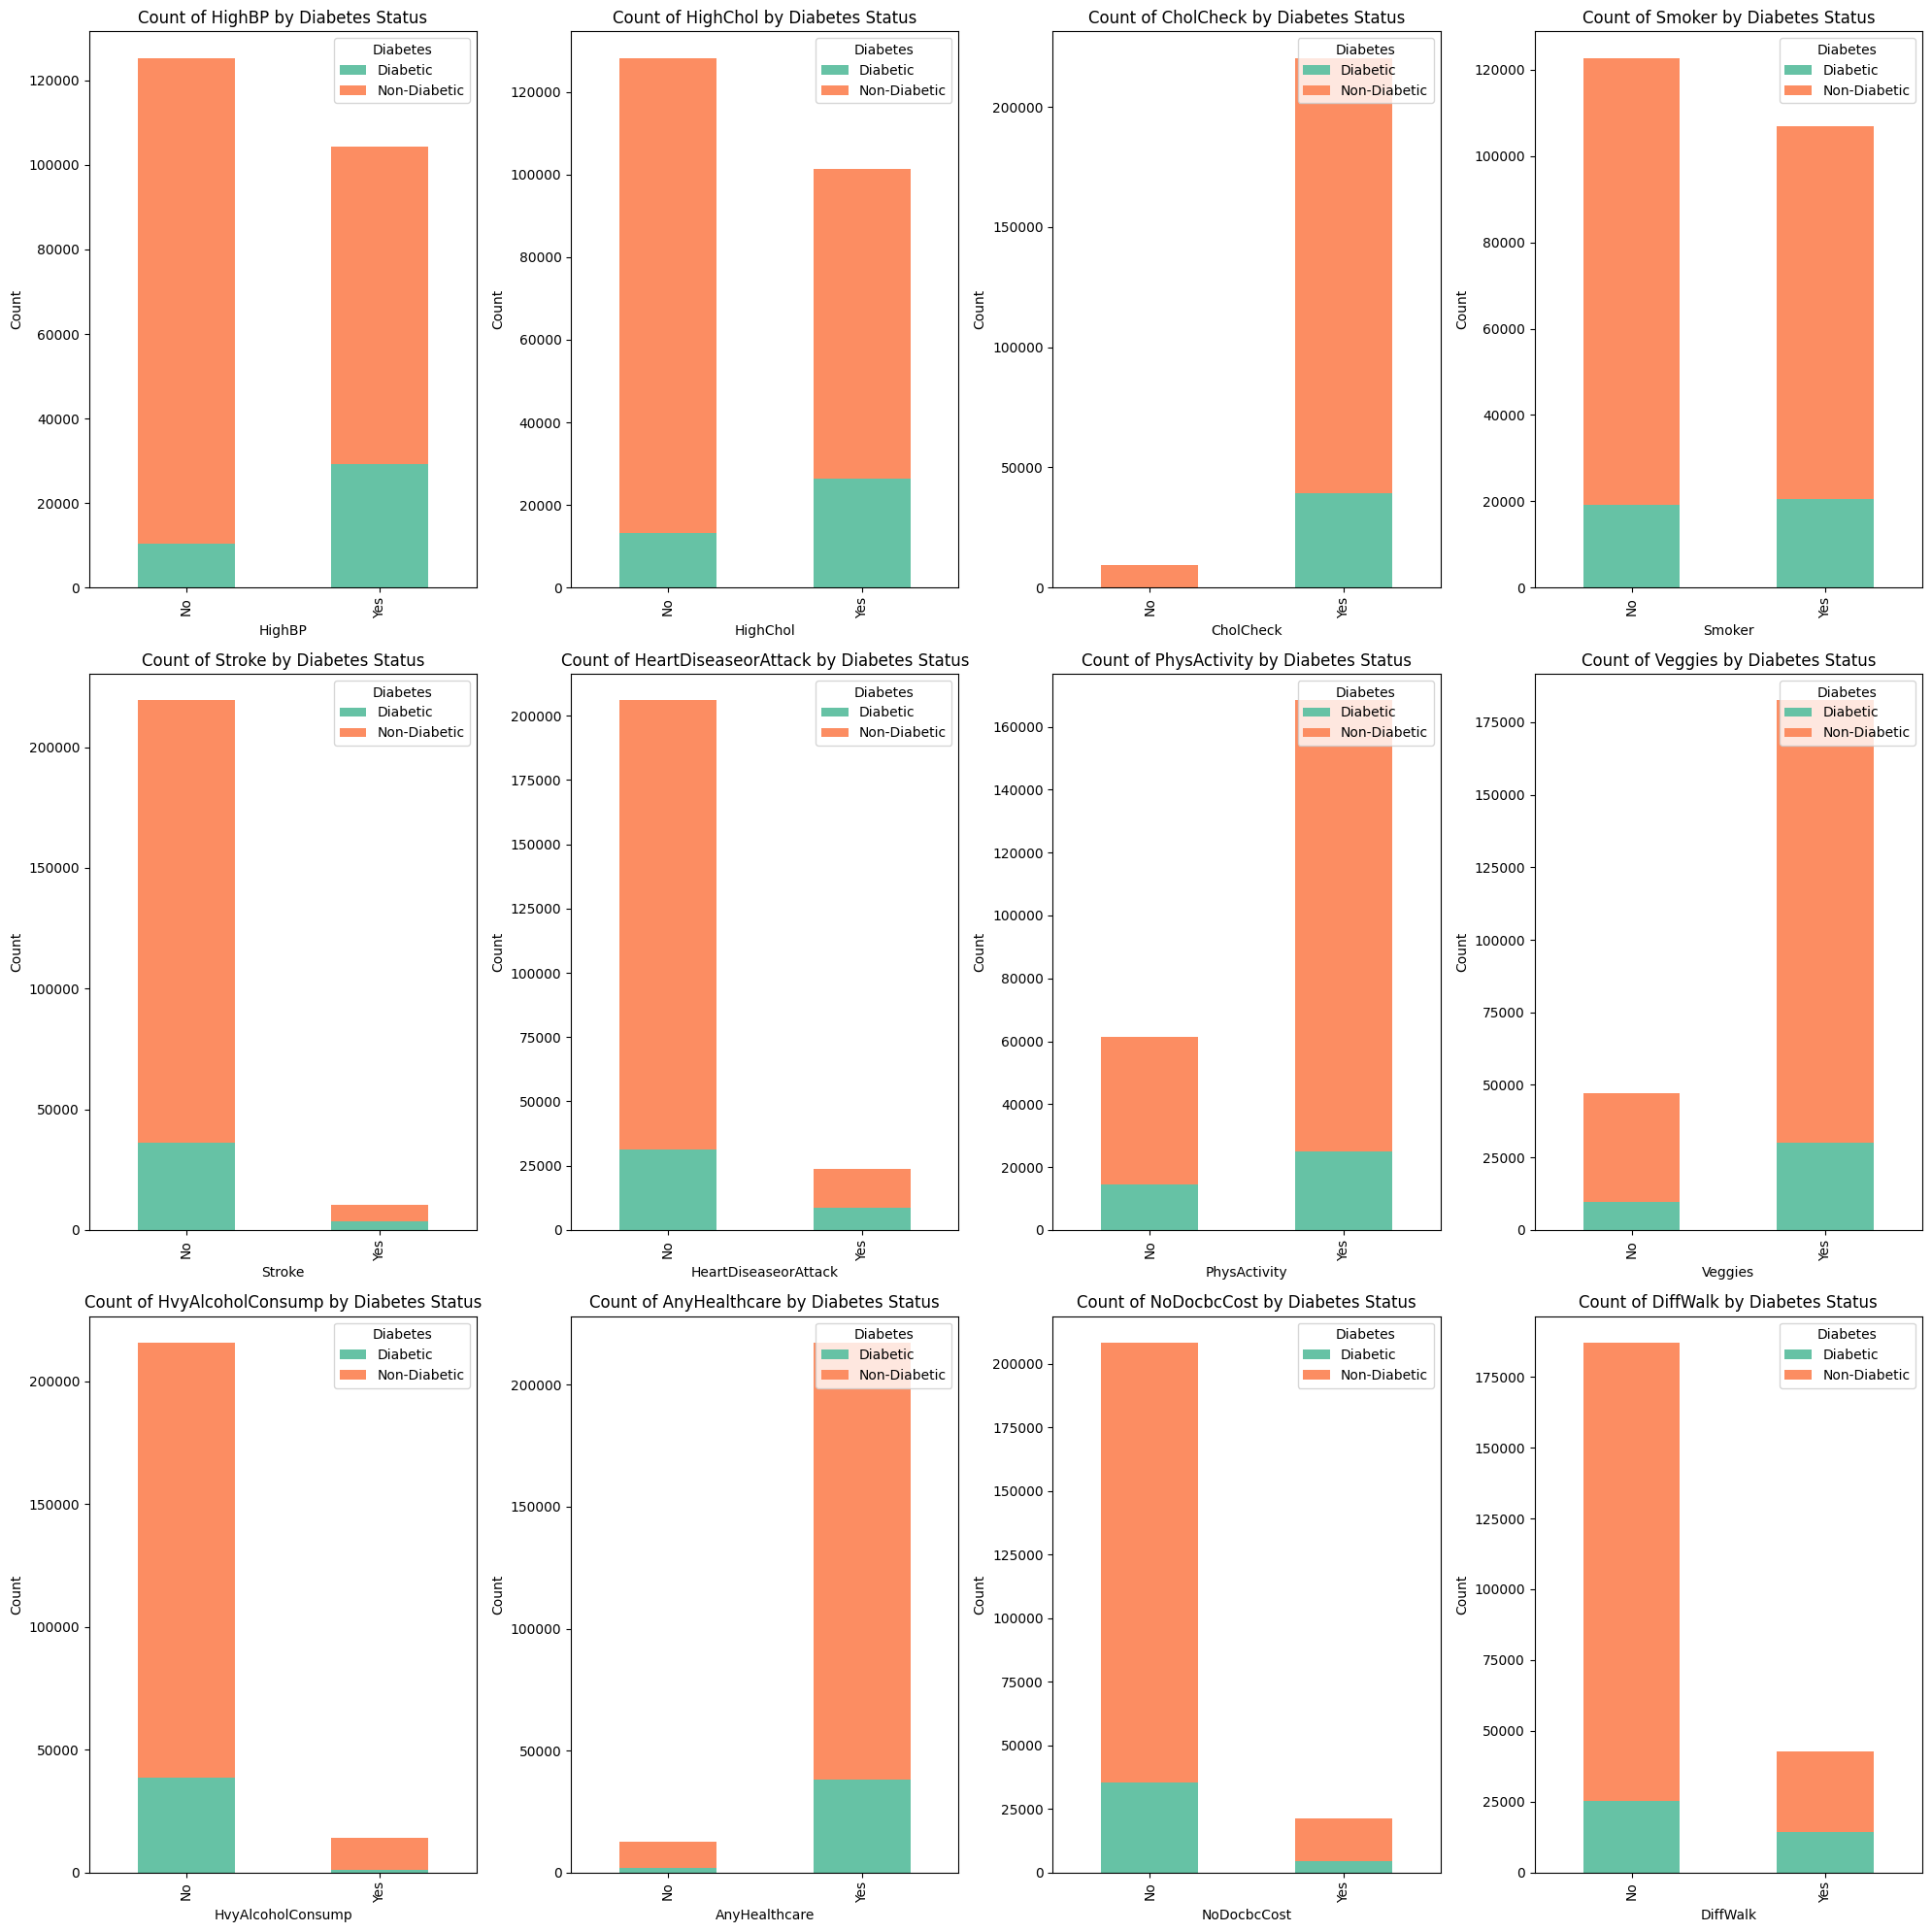

In [19]:
# Create a figure with subplots
fig, ax = plt.subplots(3, 4, figsize=(20, 20))
axe = ax.ravel()

# Custom color palette
colors = sns.color_palette("Set2")

# Loop over the columns and create a bar plot for each
for i in range(len(cols)):
    df_plot = create_plot_pivot(data2, cols[i])
    df_plot.plot(kind='bar', stacked=True, ax=axe[i], color=colors)
    axe[i].set_title(f'Count of {cols[i]} by Diabetes Status')
    axe[i].set_xlabel(cols[i])
    axe[i].set_ylabel('Count')
    axe[i].legend(title='Diabetes', loc='upper right')

# Adjust layout for better fit
plt.tight_layout()
plt.show()

* Health Conditions: Diabetic individuals have a higher prevalence of high blood pressure, high cholesterol, strokes, heart disease, and difficulty walking.
* Preventive Care: Non-diabetic individuals seem to engage more in preventive care activities like cholesterol checks and physical activity.
* Lifestyle Factors: There are more smokers and heavy alcohol consumers among non-diabetic individuals.
* Healthcare Access: Diabetic individuals face more challenges in accessing healthcare, particularly due to cost.

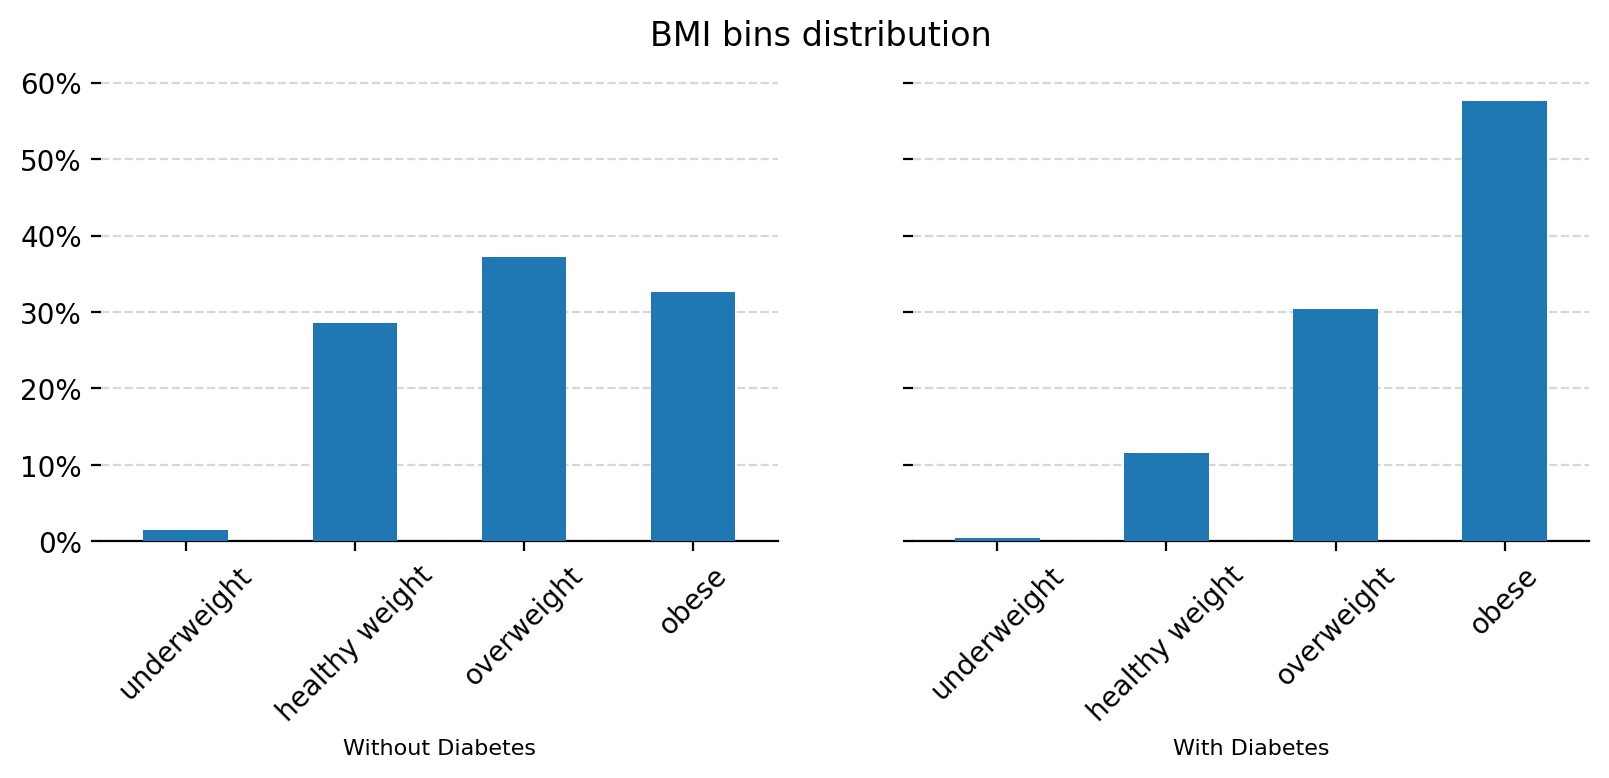

In [20]:
import matplotlib.ticker as mtick

labels = ['underweight', 'healthy weight', 'overweight', 'obese']
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('BMI bins distribution')

(data2[data2['Diabetes']==False]['BMI_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.set_xticklabels(labels)
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

(data2[data2['Diabetes']==True]['BMI_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.set_xticklabels(labels)
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45);

* If your BMI is less than 18.5, it falls within the underweight range.
* If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range.
* If your BMI is 25.0 to 29.9, it falls within the overweight range.
* If your BMI is 30.0 or higher, it falls within the obese range.

The analysis indicates that there is no significant correlation between BMI groups and the group without diabetes, whereas a strong positive correlation between diabetes and obesity was observed.

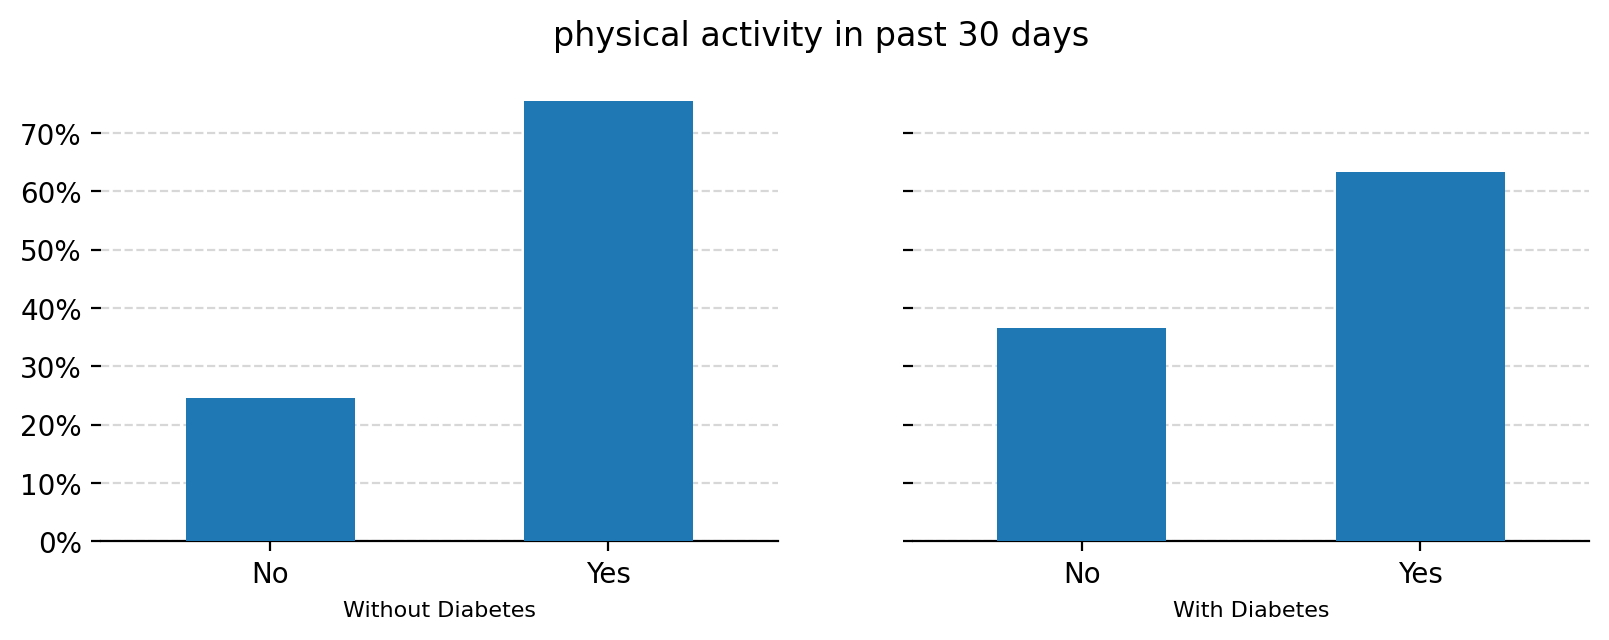

In [21]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('physical activity in past 30 days')

(data2[data2['Diabetes']==False]['PhysActivity']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)

(data2[data2['Diabetes']==True]['PhysActivity']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

The dataset analysis indicates that there are more individuals diagnosed with diabetes who report lower levels of physical activity, compared to those without the condition

<Figure size 2000x600 with 0 Axes>

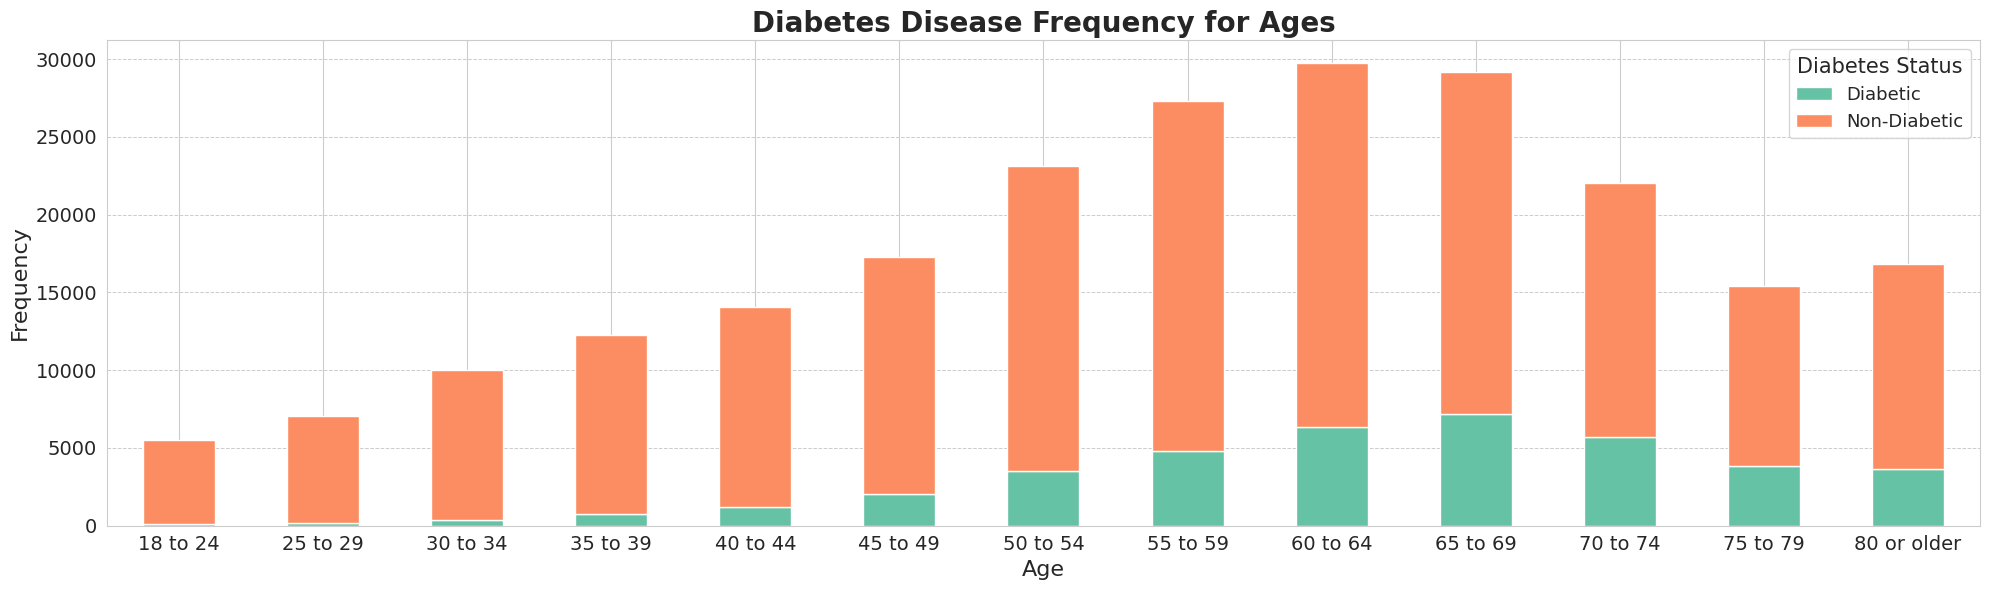

In [22]:
crosstab = pd.crosstab(data2.Age, data2.Diabetes_str)

# Set up the plot
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")

# Use seaborn to create a bar plot with a different color palette
ax = crosstab.plot(kind="bar", stacked=True, figsize=(20, 6), color=sns.color_palette("Set2"))

# Add a title and labels with customized font sizes
plt.title('Diabetes Disease Frequency for Ages', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Customize the x-axis labels rotation and font size
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Add a legend with a title and customized font size
plt.legend(title='Diabetes Status', title_fontsize='15', fontsize='13')

# Show the plot
plt.tight_layout()
plt.show()

We can conclude from this plot that as a person gets older, there is a higher chance of having diabetes, which makes sense.

# Feature selection

This dataset don't have negative values. Contains almost only categorical features. Chi-squared is the most used in this situation.

In [23]:
from sklearn.feature_selection import chi2

X = data.drop("Diabetes", axis=1)
y = data["Diabetes"]

f_score = chi2(X, y)
chisquare = pd.DataFrame(f_score).T.set_index(X.columns).rename(columns={0:'ChiSqr_Score', 1:"ChiSqr_pValue"})
chi2_list = chisquare.sort_values(by='ChiSqr_Score', ascending=False)
chi2_list

,ChiSqr_Score,ChiSqr_pValue
PhysHlth,101807.410443,0.000000e+00
BMI,16474.129760,0.000000e+00
MentHlth,13650.208098,0.000000e+00
Age,9328.021995,0.000000e+00
HighBP,8491.948397,0.000000e+00
DiffWalk,8138.865610,0.000000e+00
GenHlth,7999.373695,0.000000e+00
HeartDiseaseorAttack,5768.103819,0.000000e+00
HighChol,5353.997799,0.000000e+00
Income,3758.529728,0.000000e+00


Since we concluded earlier that certain columns have almost zero impact on our target variable (are least correlated with it), we will get rid of them.

In [24]:
columns_to_remove = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare", "NoDocbcCost", "Diabetes"]

X = data.drop(columns_to_remove, axis=1)

X.shape

(229712, 15)

## Dealing with imbalanced classes

In [25]:
y.value_counts()

Diabetes
0    190055
1     39657
Name: count, dtype: int64

For dealing with imbalanced class, which is in our case the number of people with diabetes, we will be trying both undersampling and oversampling, to see which approach gives us a better result. For undersampling we will be using NearMiss algorithm, and for oversampling SMOTE (Synthetic Minority Oversampling Technique).

In [26]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, classification_report
from sklearn.model_selection import cross_validate

def evaluate_model(model, X_train, y_train, X_test, y_test, cv=5):
    # Define the scoring metrics
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc',
        'neg_mean_squared_error': 'neg_mean_squared_error'
    }

    # Cross-validation
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring, return_train_score=False)

    # Calculate mean and standard deviation for each metric
    cv_accuracy = cv_results['test_accuracy']
    cv_precision = cv_results['test_precision']
    cv_recall = cv_results['test_recall']
    cv_f1 = cv_results['test_f1']
    cv_roc_auc = cv_results['test_roc_auc']
    cv_rmse = np.sqrt(-cv_results['test_neg_mean_squared_error'])

    print(f'Cross-Validation Accuracy: {np.mean(cv_accuracy):.4f} +/- {np.std(cv_accuracy):.4f}')
    print(f'Cross-Validation Precision: {np.mean(cv_precision):.4f} +/- {np.std(cv_precision):.4f}')
    print(f'Cross-Validation Recall: {np.mean(cv_recall):.4f} +/- {np.std(cv_recall):.4f}')
    print(f'Cross-Validation F1 Score: {np.mean(cv_f1):.4f} +/- {np.std(cv_f1):.4f}')
    print(f'Cross-Validation ROC AUC Score: {np.mean(cv_roc_auc):.4f} +/- {np.std(cv_roc_auc):.4f}')
    print(f'Cross-Validation RMSE: {np.mean(cv_rmse):.4f} +/- {np.std(cv_rmse):.4f}')

    # Fit the model
    model.fit(X_train, y_train)

    # Predict the test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = ['Negative', 'Positive']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    # Test Accuracy
    test_accuracy = accuracy_score(y_test, y_pred)

    # Test Precision
    test_precision = precision_score(y_test, y_pred)

    # Test Recall
    test_recall = recall_score(y_test, y_pred)

    # Test F1 Score
    test_f1 = f1_score(y_test, y_pred)

    # Test RMSE
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Test ROC AUC Score
    test_roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None

    # Print Test Metrics
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Test Precision: {test_precision:.4f}')
    print(f'Test Recall: {test_recall:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')
    print(f'Test RMSE: {test_rmse:.4f}')
    if test_roc_auc is not None:
        print(f'Test ROC AUC Score: {test_roc_auc:.4f}')
    print("Test Classification Report:\n", classification_report(y_test, y_pred))

    # Plot ROC Curve if probabilities are available
    if y_pred_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc_value = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_value)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
        plt.show()

    # Plot Precision-Recall Curve if probabilities are available
    if y_pred_prob is not None:
        precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob)
        plt.figure()
        plt.plot(recall_vals, precision_vals, color='blue', lw=2)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.show()

    # Feature Importance if available
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        feature_names = X.columns

        plt.figure(figsize=(10, 6))
        plt.title('Feature Importances')
        plt.bar(range(X_train.shape[1]), importances[indices], align='center')
        plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
        plt.xlim([-1, X_train.shape[1]])
        plt.show()
    elif hasattr(model, 'coef_'):
        importances = model.coef_[0]
        indices = np.argsort(importances)[::-1]
        feature_names = X.columns

        plt.figure(figsize=(10, 6))
        plt.title('Feature Importances')
        plt.bar(range(X_train.shape[1]), importances[indices], align='center')
        plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
        plt.xlim([-1, X_train.shape[1]])
        plt.show()


In [27]:
# Initializing SMOTE and Nearmiss, and StandardScaler
smote = SMOTE(sampling_strategy=1, random_state=42)
scaler = StandardScaler()

X_res, y_res = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Stacking models with SMOTE

Cross-Validation Accuracy: 0.7818 +/- 0.0014
Cross-Validation Precision: 0.7699 +/- 0.0009
Cross-Validation Recall: 0.8036 +/- 0.0029
Cross-Validation F1 Score: 0.7864 +/- 0.0016
Cross-Validation ROC AUC Score: 0.8555 +/- 0.0010
Cross-Validation RMSE: 0.4672 +/- 0.0015
Confusion Matrix:
 [[44074 12943]
 [10730 46286]]
Test Accuracy: 0.7924
Test Precision: 0.7815
Test Recall: 0.8118
Test F1 Score: 0.7964
Test RMSE: 0.4556
Test ROC AUC Score: 0.8653
Test Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79     57017
           1       0.78      0.81      0.80     57016

    accuracy                           0.79    114033
   macro avg       0.79      0.79      0.79    114033
weighted avg       0.79      0.79      0.79    114033



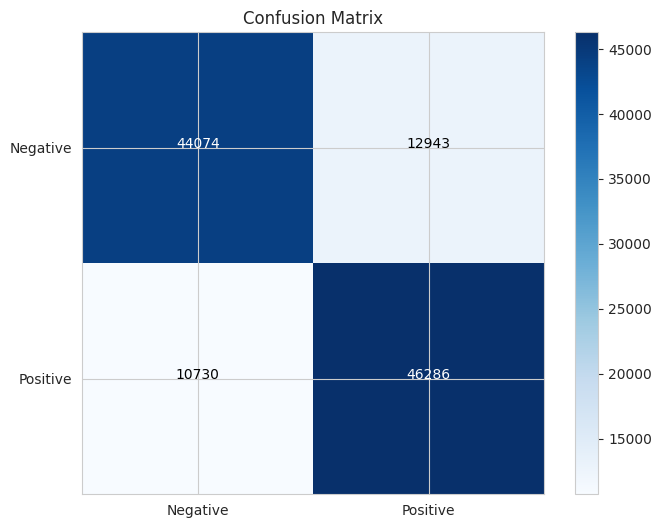

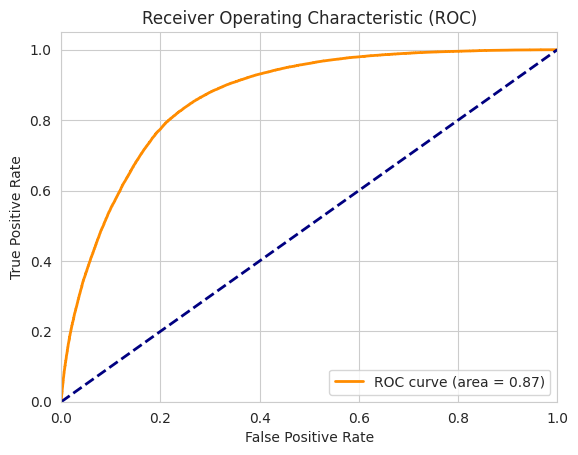

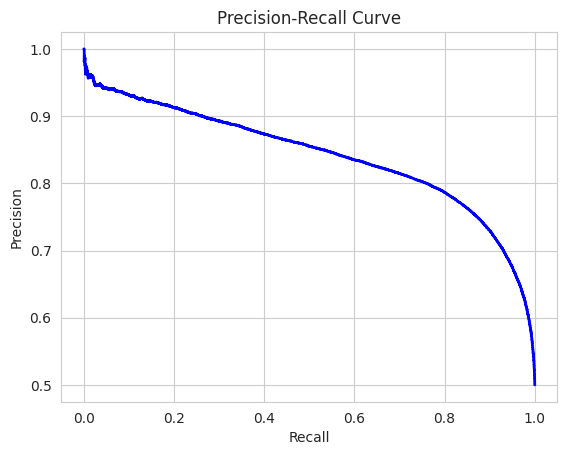

In [28]:
from xgboost import XGBClassifier

base_learners = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('xgb', XGBClassifier())
]

stacking_model_smote = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(random_state=42))

evaluate_model(stacking_model_smote, X_train, y_train, X_test, y_test)

## Bagging model with SMOTE

Cross-Validation Accuracy: 0.8118 +/- 0.0005
Cross-Validation Precision: 0.7833 +/- 0.0005
Cross-Validation Recall: 0.8621 +/- 0.0014
Cross-Validation F1 Score: 0.8208 +/- 0.0006
Cross-Validation ROC AUC Score: 0.8956 +/- 0.0011
Cross-Validation RMSE: 0.4338 +/- 0.0006
Confusion Matrix:
 [[44093 12924]
 [ 7085 49931]]
Test Accuracy: 0.8245
Test Precision: 0.7944
Test Recall: 0.8757
Test F1 Score: 0.8331
Test RMSE: 0.4189
Test ROC AUC Score: 0.9075
Test Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.82     57017
           1       0.79      0.88      0.83     57016

    accuracy                           0.82    114033
   macro avg       0.83      0.82      0.82    114033
weighted avg       0.83      0.82      0.82    114033



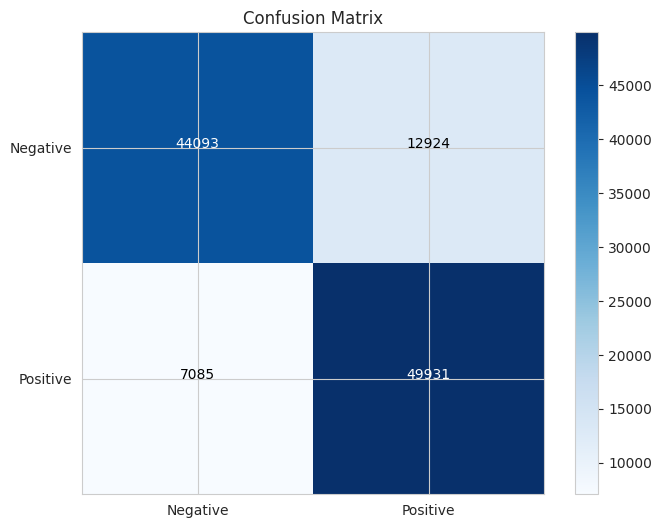

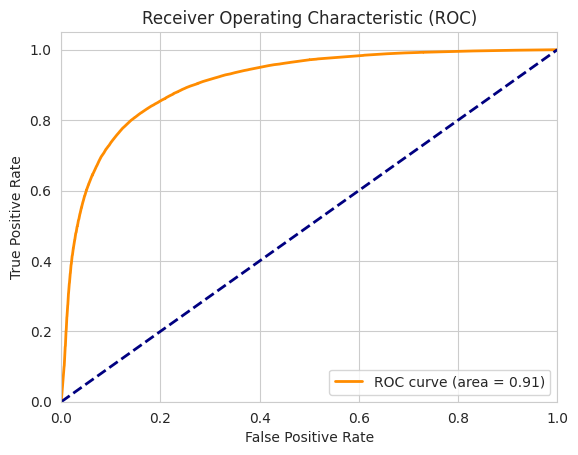

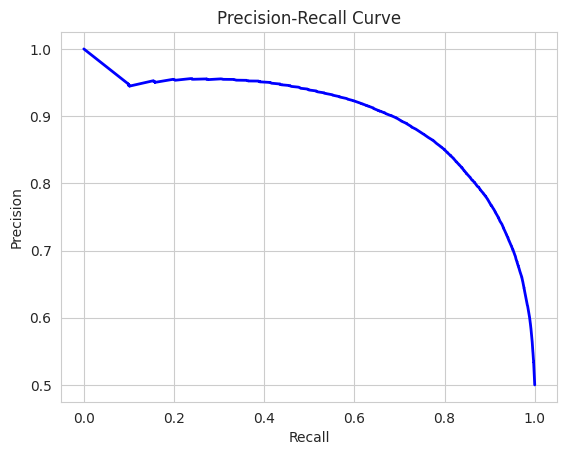

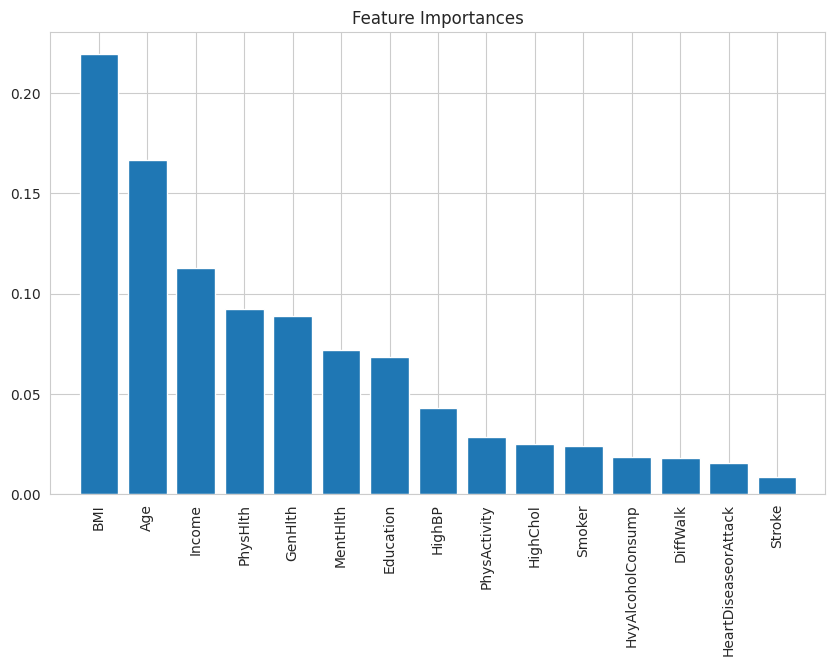

In [29]:
rfc_smote = RandomForestClassifier(random_state=42)

evaluate_model(rfc_smote, X_train, y_train, X_test, y_test)

## Boosting model with SMOTE

Cross-Validation Accuracy: 0.7425 +/- 0.0003
Cross-Validation Precision: 0.7253 +/- 0.0005
Cross-Validation Recall: 0.7806 +/- 0.0017
Cross-Validation F1 Score: 0.7519 +/- 0.0006
Cross-Validation ROC AUC Score: 0.8212 +/- 0.0005
Cross-Validation RMSE: 0.5075 +/- 0.0003
Confusion Matrix:
 [[40280 16737]
 [12538 44478]]
Test Accuracy: 0.7433
Test Precision: 0.7266
Test Recall: 0.7801
Test F1 Score: 0.7524
Test RMSE: 0.5067
Test ROC AUC Score: 0.8229
Test Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.71      0.73     57017
           1       0.73      0.78      0.75     57016

    accuracy                           0.74    114033
   macro avg       0.74      0.74      0.74    114033
weighted avg       0.74      0.74      0.74    114033



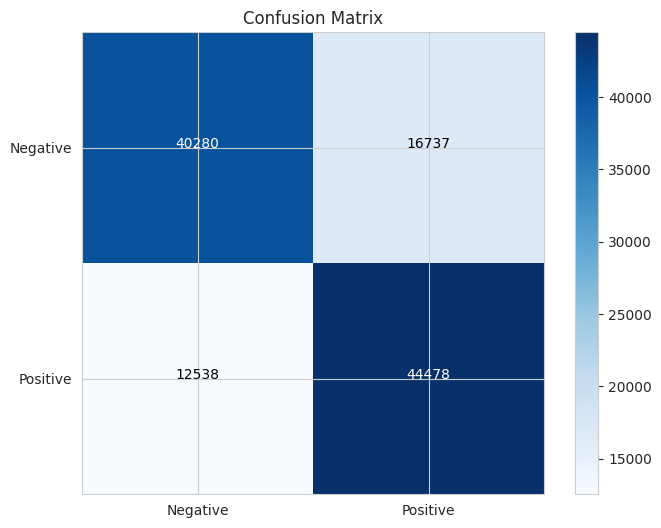

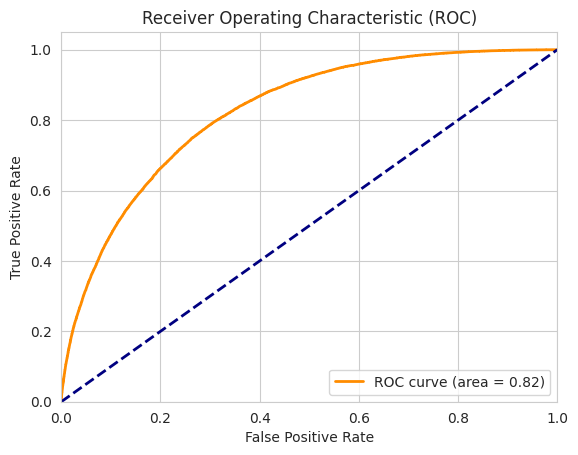

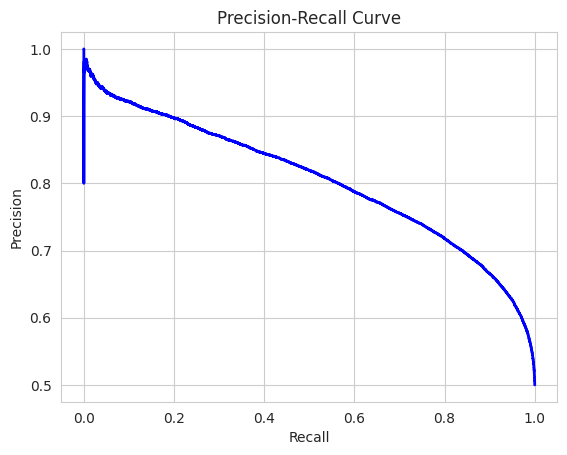

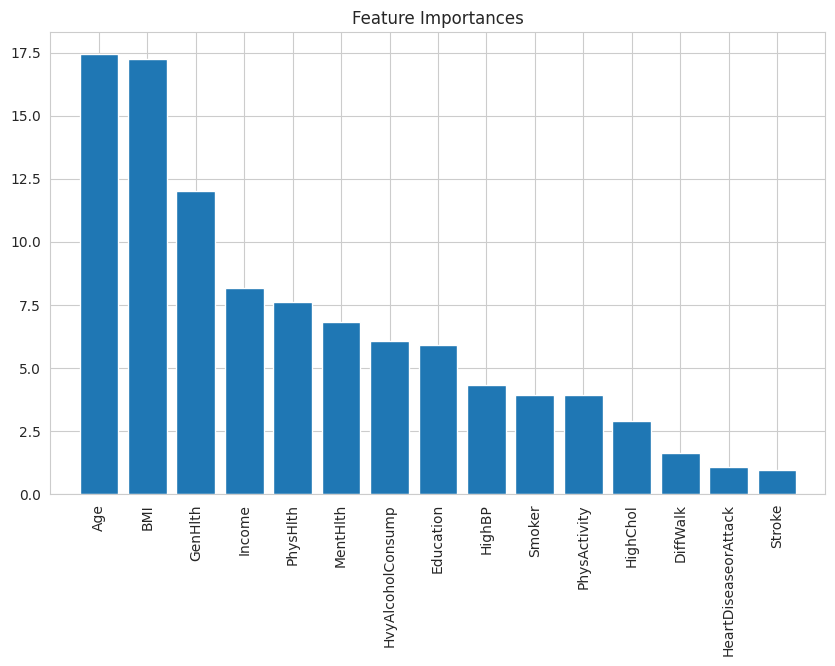

In [32]:
from catboost import CatBoostClassifier

cb_smote = CatBoostClassifier(silent=True)

evaluate_model(cb_smote, X_train, y_train, X_test, y_test)

## Stacking model with NearMiss

In [33]:
nm = NearMiss(version = 1, n_neighbors = 10)
scaler = StandardScaler()

X_res, y_res = nm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train.value_counts()

Diabetes
1    27760
0    27759
Name: count, dtype: int64

Cross-Validation Accuracy: 0.8604 +/- 0.0007
Cross-Validation Precision: 0.9104 +/- 0.0024
Cross-Validation Recall: 0.7994 +/- 0.0019
Cross-Validation F1 Score: 0.8513 +/- 0.0007
Cross-Validation ROC AUC Score: 0.9256 +/- 0.0012
Cross-Validation RMSE: 0.3737 +/- 0.0010
Confusion Matrix:
 [[10981   917]
 [ 2439  9458]]
Test Accuracy: 0.8590
Test Precision: 0.9116
Test Recall: 0.7950
Test F1 Score: 0.8493
Test RMSE: 0.3756
Test ROC AUC Score: 0.9245
Test Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87     11898
           1       0.91      0.79      0.85     11897

    accuracy                           0.86     23795
   macro avg       0.86      0.86      0.86     23795
weighted avg       0.86      0.86      0.86     23795



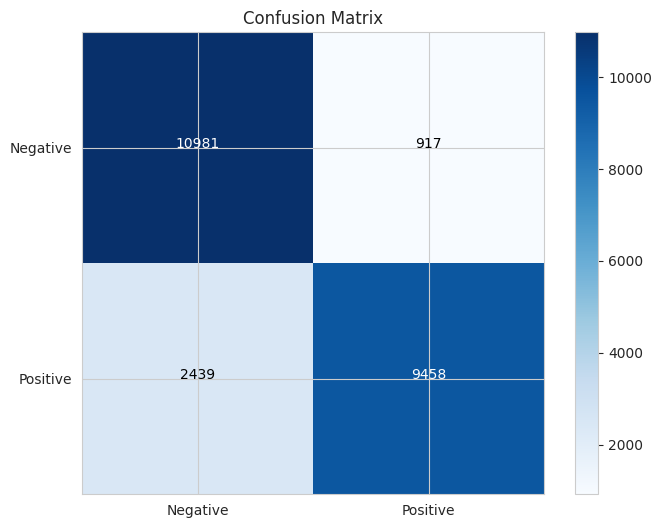

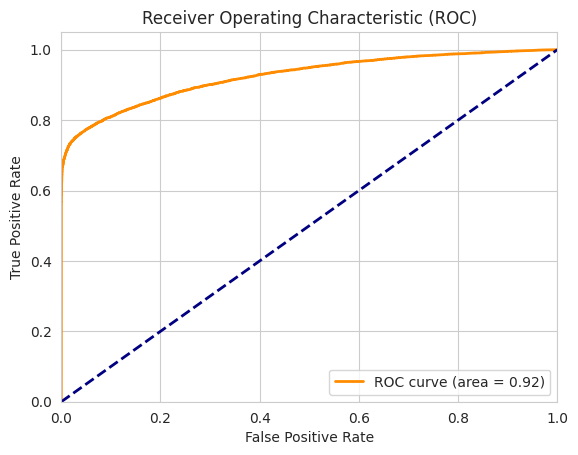

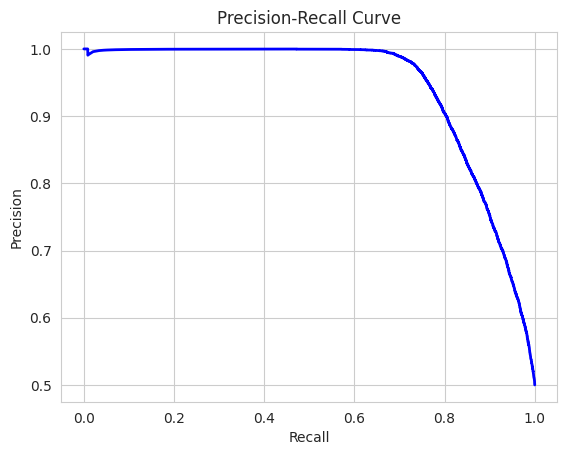

In [34]:
base_learners = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('xgb', XGBClassifier())
]

stacking_model_nm = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(random_state=42))

evaluate_model(stacking_model_nm, X_train, y_train, X_test, y_test)

## Bagging model (Random Forest Classifier) with NearMiss

Cross-Validation Accuracy: 0.8272 +/- 0.0018
Cross-Validation Precision: 0.8548 +/- 0.0054
Cross-Validation Recall: 0.7884 +/- 0.0036
Cross-Validation F1 Score: 0.8202 +/- 0.0013
Cross-Validation ROC AUC Score: 0.8958 +/- 0.0015
Cross-Validation RMSE: 0.4157 +/- 0.0022
Confusion Matrix:
 [[10295  1603]
 [ 2595  9302]]
Test Accuracy: 0.8236
Test Precision: 0.8530
Test Recall: 0.7819
Test F1 Score: 0.8159
Test RMSE: 0.4200
Test ROC AUC Score: 0.8926
Test Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83     11898
           1       0.85      0.78      0.82     11897

    accuracy                           0.82     23795
   macro avg       0.83      0.82      0.82     23795
weighted avg       0.83      0.82      0.82     23795



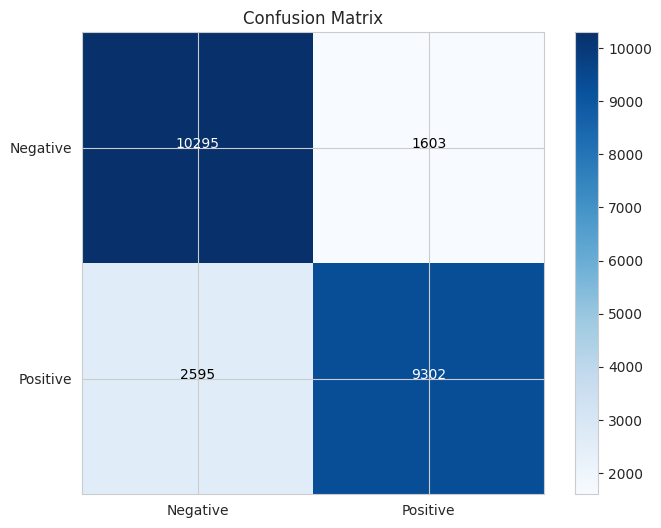

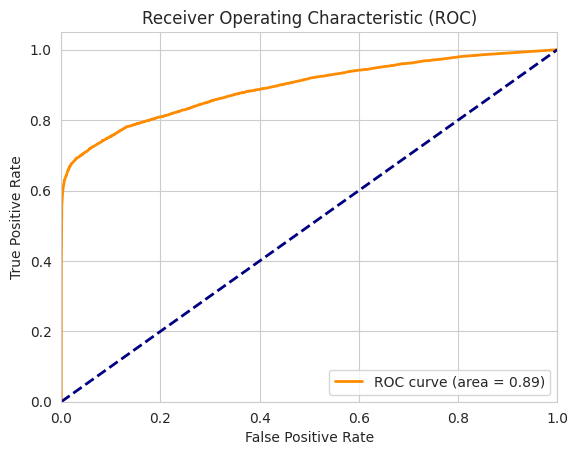

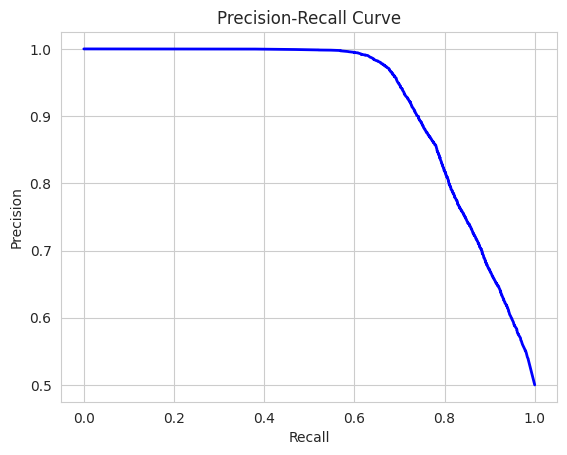

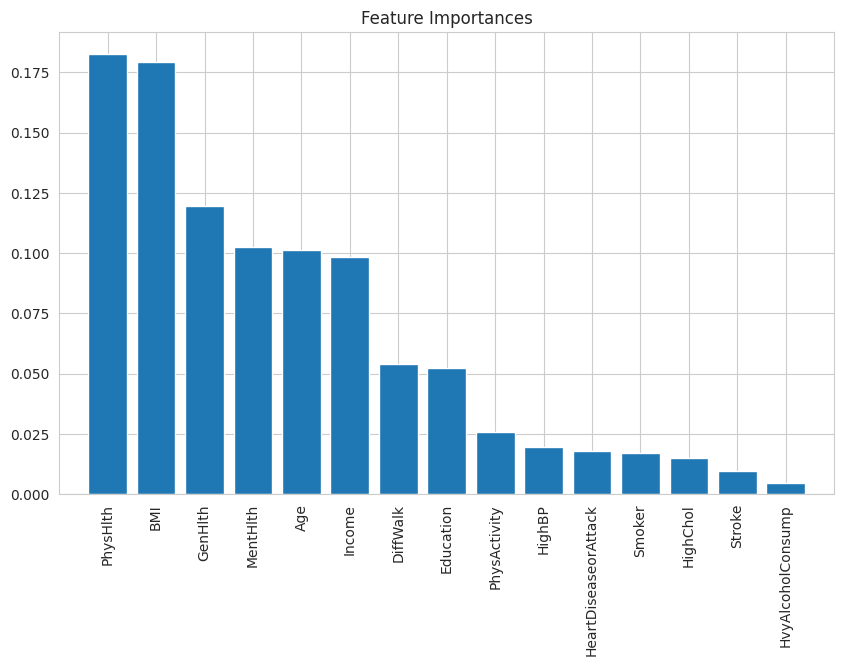

In [35]:
rfc_nm = RandomForestClassifier(random_state=42)

evaluate_model(rfc_nm, X_train, y_train, X_test, y_test)

## Boosting model with NearMiss

Cross-Validation Accuracy: 0.8640 +/- 0.0010
Cross-Validation Precision: 0.9308 +/- 0.0025
Cross-Validation Recall: 0.7866 +/- 0.0030
Cross-Validation F1 Score: 0.8526 +/- 0.0012
Cross-Validation ROC AUC Score: 0.9256 +/- 0.0015
Cross-Validation RMSE: 0.3687 +/- 0.0013
Confusion Matrix:
 [[11195   703]
 [ 2596  9301]]
Test Accuracy: 0.8614
Test Precision: 0.9297
Test Recall: 0.7818
Test F1 Score: 0.8494
Test RMSE: 0.3723
Test ROC AUC Score: 0.9240
Test Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87     11898
           1       0.93      0.78      0.85     11897

    accuracy                           0.86     23795
   macro avg       0.87      0.86      0.86     23795
weighted avg       0.87      0.86      0.86     23795



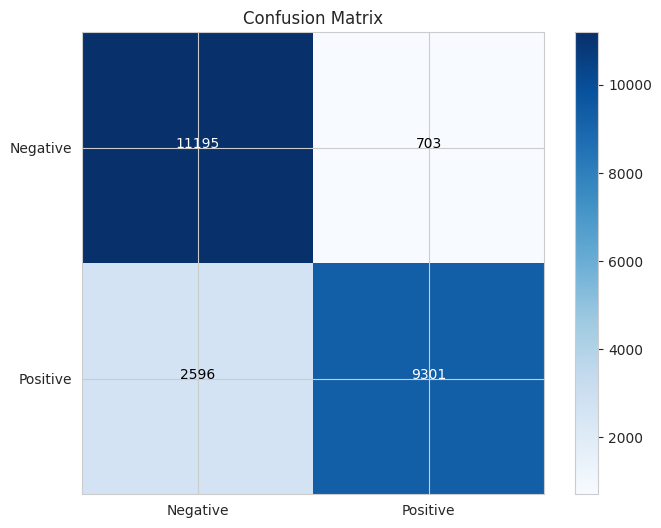

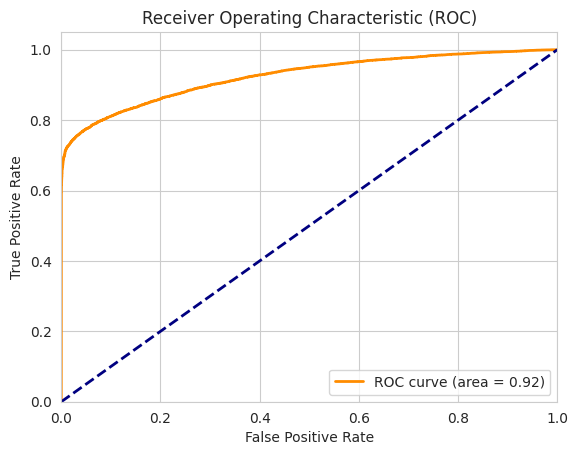

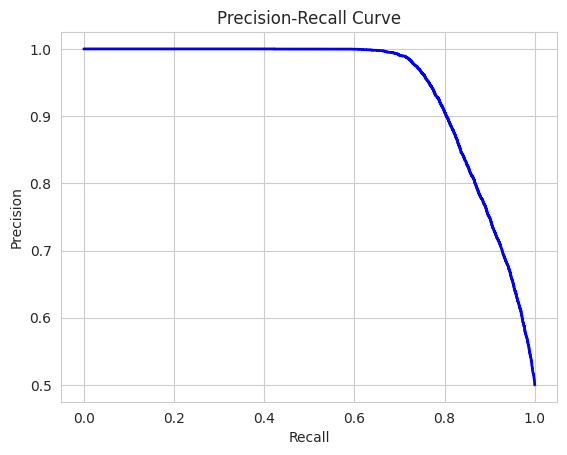

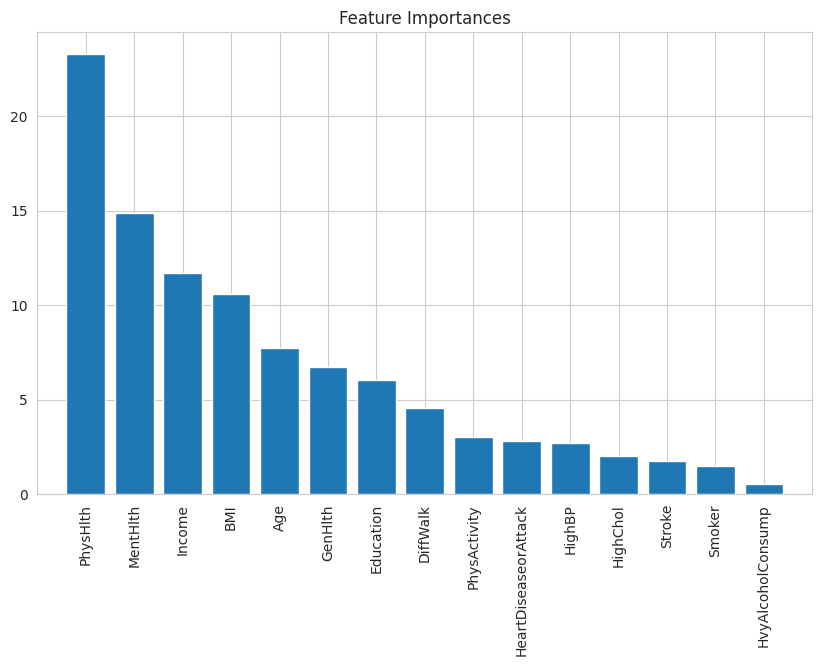

In [36]:
cb_nm = CatBoostClassifier(silent=True)

evaluate_model(cb_nm, X_train, y_train, X_test, y_test)

## KNeighborsClassifier with NearMiss

1
2
3
4
5
6
7
8
9


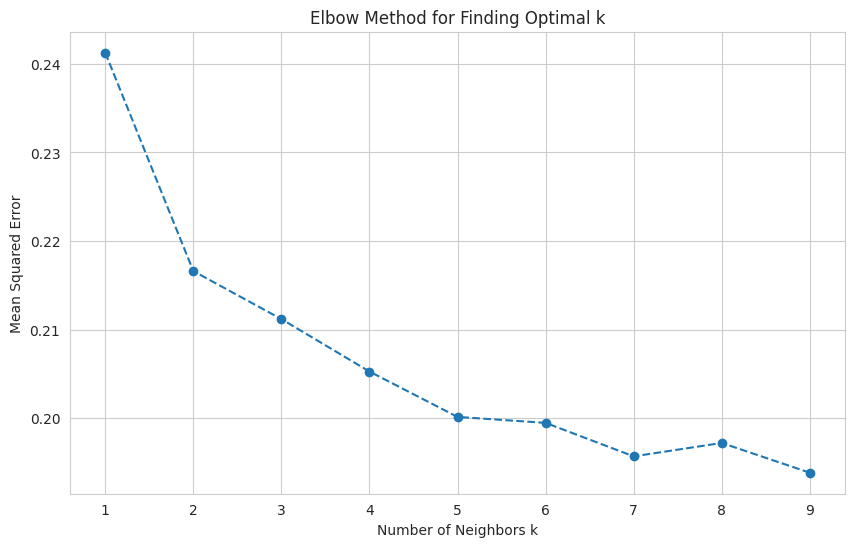

The optimal number of neighbors (k) is: 9


In [37]:
from sklearn.neighbors import KNeighborsClassifier

error_rates = []

# Define the range of k values to test
k_range = range(1, 10)

# Loop over different values of k
for k in k_range:
    print(k)
    # Initialize and fit the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = knn.predict(X_test)

    # Calculate the error rate (here using mean squared error)
    error_rate = mean_squared_error(y_test, y_pred)
    error_rates.append(error_rate)

# Plot the error rate against k values
plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rates, marker='o', linestyle='--')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Mean Squared Error')
plt.title('Elbow Method for Finding Optimal k')
plt.show()

# Identify the optimal k (elbow point)
optimal_k = k_range[np.argmin(error_rates)]
print(f'The optimal number of neighbors (k) is: {optimal_k}')

final_knn = KNeighborsClassifier(n_neighbors=optimal_k)

Cross-Validation Accuracy: 0.8044 +/- 0.0011
Cross-Validation Precision: 0.8991 +/- 0.0042
Cross-Validation Recall: 0.6859 +/- 0.0039
Cross-Validation F1 Score: 0.7781 +/- 0.0016
Cross-Validation ROC AUC Score: 0.8705 +/- 0.0017
Cross-Validation RMSE: 0.4422 +/- 0.0013
Confusion Matrix:
 [[10965   933]
 [ 3679  8218]]
Test Accuracy: 0.8062
Test Precision: 0.8980
Test Recall: 0.6908
Test F1 Score: 0.7809
Test RMSE: 0.4403
Test ROC AUC Score: 0.8724
Test Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.83     11898
           1       0.90      0.69      0.78     11897

    accuracy                           0.81     23795
   macro avg       0.82      0.81      0.80     23795
weighted avg       0.82      0.81      0.80     23795



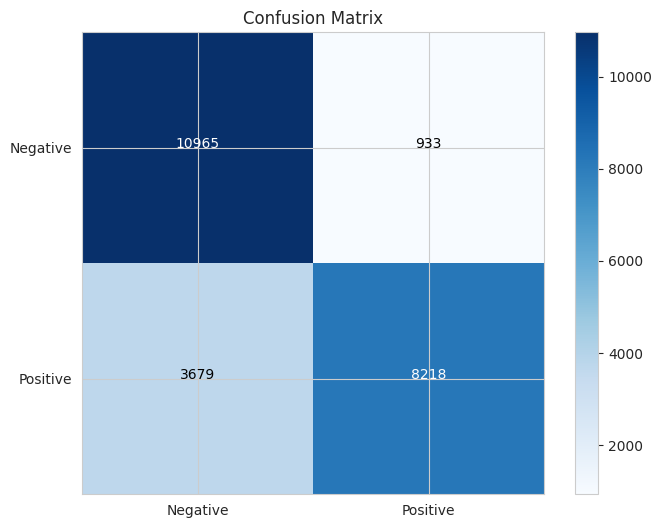

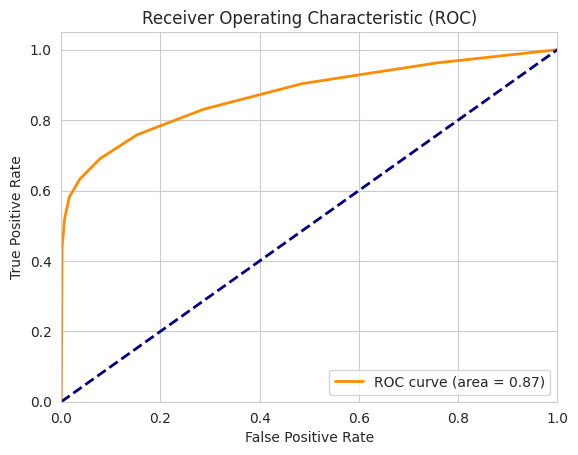

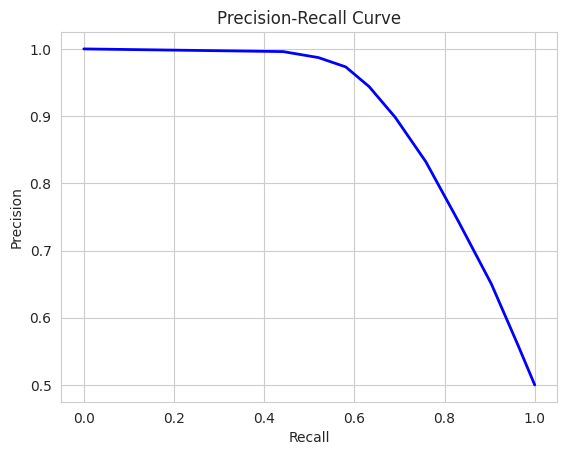

In [38]:
evaluate_model(final_knn, X_train, y_train, X_test, y_test)

## Best performing model

The best performing models are Stacking model with Nearmiss undersampling and Catboost model with Nearmiss undersampling, they give almost the same results, I decided to pick catboost model to do hyperparameter tuning, because stacking model is more complex, it consists out of 3 models, it will take a lot computing power to do hyperparameter tuning. I will use recall as the scoring metric, because it's very important in domains such as medical (e.g. identifying cancer), where you really want to minimize the chance of missing positive cases (predicting false negatives). These are typically cases where missing a positive case has a much bigger cost than wrongly classifying something as positive.

### Hyperparameter tuning

In [39]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(silent=True)

# Define the parameter grid for hyperparameter tuning, including default parameters
param_grid = {
    'depth': [6, 8, 10, 'None'],
    'learning_rate': [0.01, 0.1, 0.2, 'None'],
    'iterations': [500, 1000, 'None'],
    'l2_leaf_reg': [1, 3, 5, 'None'],
    'border_count': [32, 64, 128, 'None']
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(catboost_model, param_grid, n_iter=50, cv=3, scoring='recall', n_jobs=-1, random_state=42, verbose=10)
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
best_catboost_model = random_search.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 1000, 'depth': 6, 'border_count': 64}


Cross-Validation Accuracy: 0.8622 +/- 0.0012
Cross-Validation Precision: 0.9293 +/- 0.0016
Cross-Validation Recall: 0.7840 +/- 0.0030
Cross-Validation F1 Score: 0.8505 +/- 0.0015
Cross-Validation ROC AUC Score: 0.9228 +/- 0.0015
Cross-Validation RMSE: 0.3712 +/- 0.0016
Confusion Matrix:
 [[11182   716]
 [ 2624  9273]]
Test Accuracy: 0.8596
Test Precision: 0.9283
Test Recall: 0.7794
Test F1 Score: 0.8474
Test RMSE: 0.3747
Test ROC AUC Score: 0.9220
Test Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87     11898
           1       0.93      0.78      0.85     11897

    accuracy                           0.86     23795
   macro avg       0.87      0.86      0.86     23795
weighted avg       0.87      0.86      0.86     23795



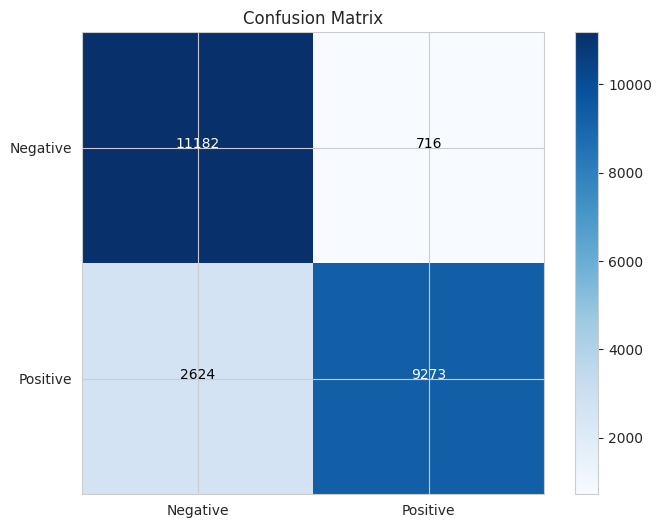

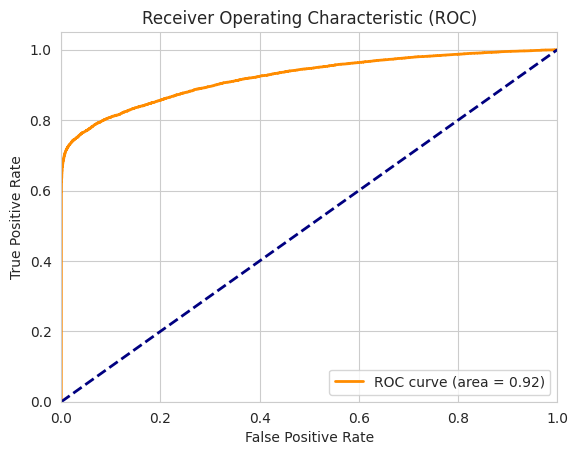

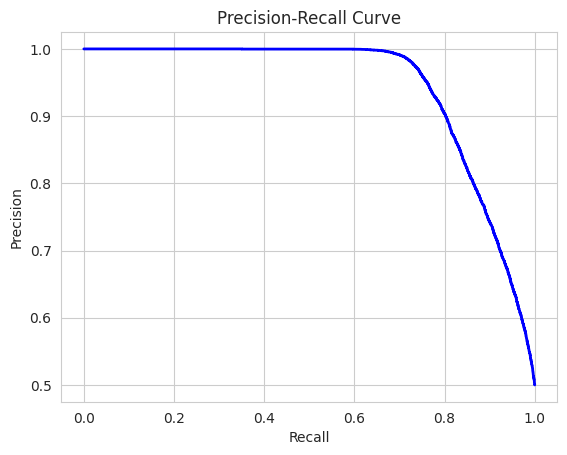

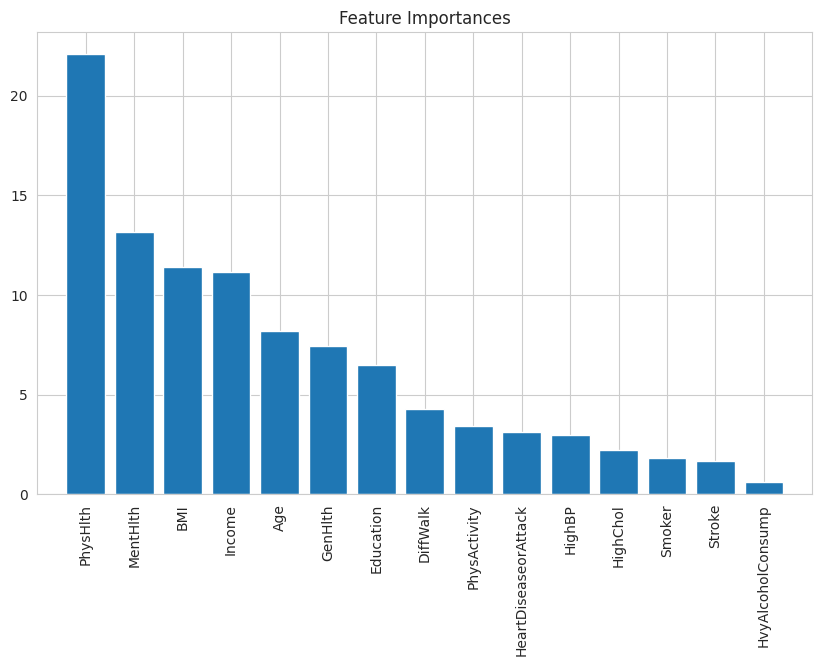

In [40]:
evaluate_model(best_catboost_model, X_train, y_train, X_test, y_test)

### Feature selection

In [41]:
from sklearn.feature_selection import RFECV

# Using Recursive Feature Elimination with Cross-Validation (RFECV)
selector = RFECV(best_catboost_model, step=1, cv=3, scoring='recall', verbose=10)
selector = selector.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[selector.support_]

# Train the model with selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting 

Cross-Validation Accuracy: 0.8610 +/- 0.0013
Cross-Validation Precision: 0.9277 +/- 0.0024
Cross-Validation Recall: 0.7831 +/- 0.0038
Cross-Validation F1 Score: 0.8493 +/- 0.0017
Cross-Validation ROC AUC Score: 0.9216 +/- 0.0013
Cross-Validation RMSE: 0.3728 +/- 0.0017
Confusion Matrix:
 [[11202   696]
 [ 2639  9258]]
Test Accuracy: 0.8598
Test Precision: 0.9301
Test Recall: 0.7782
Test F1 Score: 0.8474
Test RMSE: 0.3744
Test ROC AUC Score: 0.9209
Test Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87     11898
           1       0.93      0.78      0.85     11897

    accuracy                           0.86     23795
   macro avg       0.87      0.86      0.86     23795
weighted avg       0.87      0.86      0.86     23795



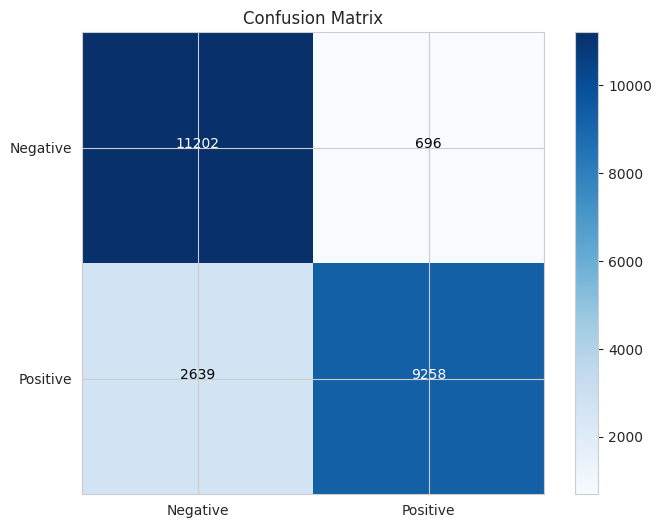

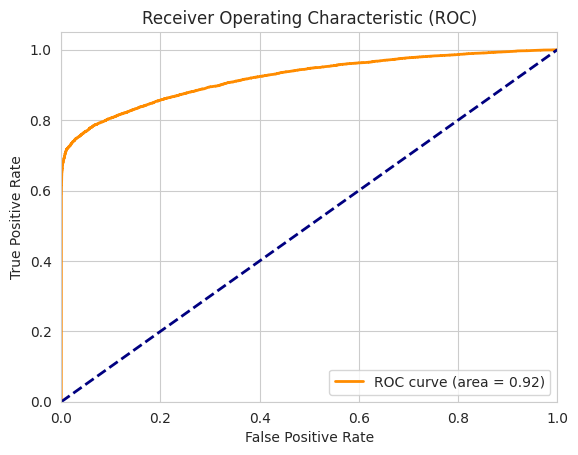

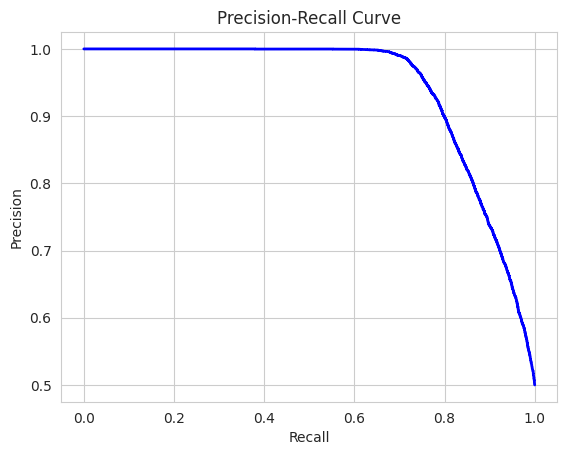

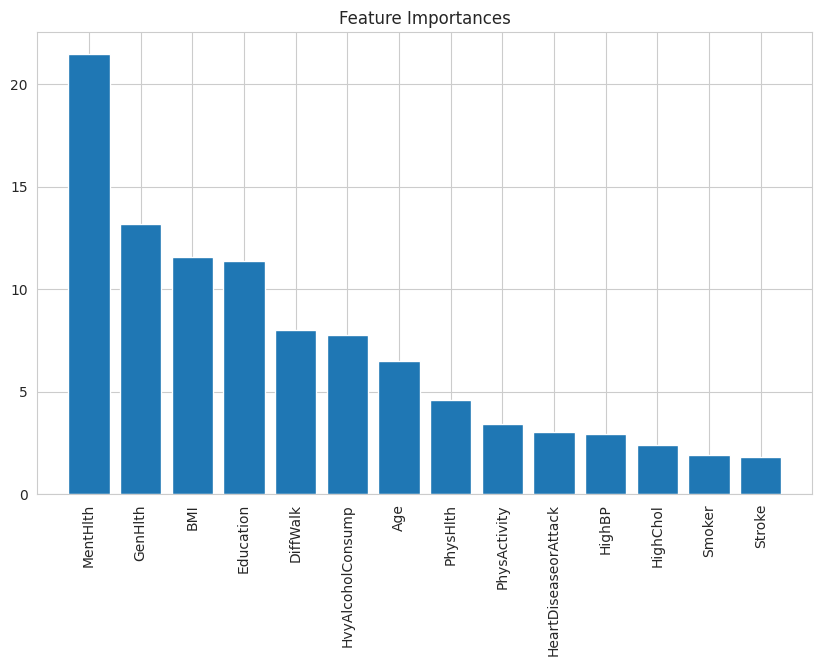

In [42]:
evaluate_model(best_catboost_model, X_train_selected, y_train, X_test_selected, y_test)

# Conclusion and further improvements

In this project I implemented a predictive model for diabetes using various machine learning techniques and addressed class imbalance effectively. The CatBoost model, after hyperparameter tuning, showed excellent performance in predicting diabetes, particularly in minimizing false negatives. The insights gained from this analysis can be valuable for healthcare professionals in designing preventive measures and early interventions for diabetes.
Improvements to consider:
1. Model Enhancements:
    * Ensemble Learning: Experiment with more complex ensemble methods such as stacked generalization with diverse base models.
    * Deep Learning Models: Explore the use of deep learning models (e.g., neural networks, recurrent neural networks) which can capture complex patterns in large datasets.
    * Transfer Learning: Utilize transfer learning from pre-trained models on similar health datasets to improve predictive accuracy.
2. Handling Class Imbalance:
    * Advanced Resampling Techniques: Implement more sophisticated resampling techniques like ADASYN (Adaptive Synthetic Sampling) or combined over and under-sampling methods.
    * Cost-Sensitive Learning: Incorporate cost-sensitive learning to penalize misclassifications of the minority class more heavily.
3.  Model Interpretability and Explainability:
    * SHAP Values and LIME: Use SHAP (SHapley Additive exPlanations) values and LIME (Local Interpretable Model-agnostic Explanations) to provide insights into model predictions.
    * Rule-Based Models: Develop rule-based models that are inherently interpretable for easier understanding by healthcare professionals.
4. Model Deployment and Integration:
    * Real-Time Prediction System: Develop a real-time prediction system integrated with electronic health records (EHR) for timely diagnosis and intervention.

